# Z-test
https://en.wikipedia.org/wiki/Z-test

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as st

In [29]:
MEAN_A = 10           # среднее значение в эксперименте A
MEAN_B = 12           # среднее значение в эксперименте B
POPULATION_STD = 10.  # задаем дисперсию в популяции
N_SAMPLES = 250       # число наблюдений в каждом из экспериментов

In [30]:
# Семплируем данные экспериментов
X_a = np.random.normal(loc=MEAN_A,
                       scale=POPULATION_STD,
                       size=N_SAMPLES)

X_b = np.random.normal(loc=MEAN_B,
                       scale=POPULATION_STD,
                       size=N_SAMPLES)

X_mean_a = np.mean(X_a)
X_mean_b = np.mean(X_b)

In [31]:
X_mean_a, X_mean_b

(10.325401759149187, 11.647815256339076)

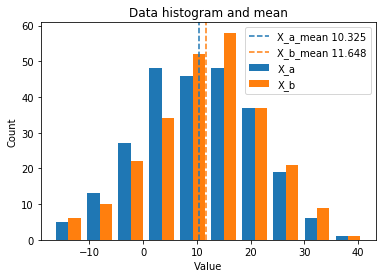

In [32]:
# Визуализируем данные экспериментов 
plt.hist([X_a, X_b])
plt.axvline(x=X_mean_a, color='C0', linestyle='--')
plt.axvline(x=X_mean_b, color='C1', linestyle='--')
plt.ylabel('Count')
plt.xlabel('Value')
plt.title('Data histogram and mean')
plt.legend(['X_a_mean %.3f' % X_mean_a,
            'X_b_mean %.3f' % X_mean_b,
            'X_a', 'X_b']);

In [33]:
# Оцениваем стандартную ошибку
se_a = se_b = POPULATION_STD / np.sqrt(N_SAMPLES)
se_ab = np.sqrt(se_a ** 2 + se_b ** 2)  # стандартная ошибка разности

In [34]:
diff = (X_mean_b - X_mean_a)       # разность средних значений двух экспериментов
z = diff / se_ab                   # вычисляем z-статистику
z_quantile = st.norm.cdf(z)        # вычисляем квантиль z-статистики
print('diff=%.2f z=%.2f q=%.2f' % (diff, z, z_quantile))

diff=1.32 z=1.48 q=0.93


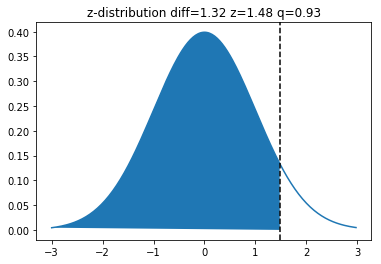

In [35]:
# Визуализируем z-распределение
x = np.arange(-3, 3, 0.025)
plt.plot(x, st.norm.pdf(x))
plt.axvline(z, color='k', linestyle='--')
plt.fill(np.hstack([x[x < z], [z]]),
         np.hstack([st.norm.pdf(x[x < z]), [0]]))
plt.title('z-distribution diff=%.2f z=%.2f q=%.2f' % (diff, z, z_quantile));